In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [88]:
data = pd.read_csv('C:/Users/82106/Desktop/인공지능/Raisin_Dataset.csv')

In [89]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [90]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [91]:
data= data.dropna()

In [92]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'Class')

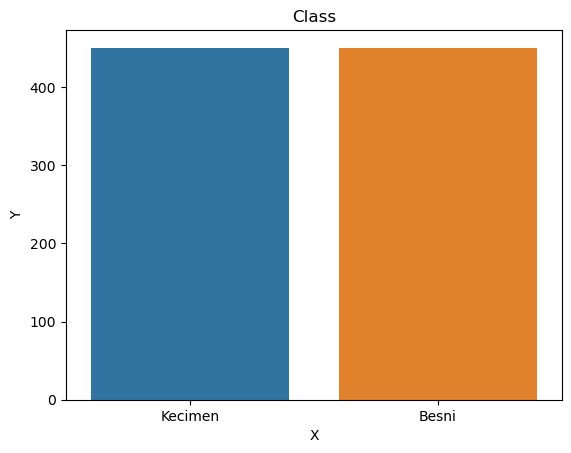

In [93]:
sns.countplot(data =data, x="Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Class")

In [94]:
X=data.drop('Class',axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [95]:
y = data['Class']
y.head()

0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: Class, dtype: object

In [96]:
data.shape

(900, 8)

In [97]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [98]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [99]:
X.shape

(900, 7)

In [100]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [101]:
Y.shape

(900, 2)

In [102]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras import models
from keras import layers

#model = Model(inputs=inputs, outputs=output)
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(40, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(11, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0007), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 40)                320       
                                                                 
 dense_37 (Dense)            (None, 20)                820       
                                                                 
 dense_38 (Dense)            (None, 16)                336       
                                                                 
 dense_39 (Dense)            (None, 16)                272       
                                                                 
 dense_40 (Dense)            (None, 11)                187       
                                                                 
 dense_41 (Dense)            (None, 2)                 24        
                                                                 
Total params: 1,959
Trainable params: 1,959
Non-traina

C:\Users\82106\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [109]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 6ms/step - loss: 2117.6680 - accuracy: 0.4903 - val_loss: 366.0026 - val_accuracy: 0.5389
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 141.8223 - accuracy: 0.5306 - val_loss: 46.3267 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 30.4061 - accuracy: 0.5333 - val_loss: 19.7909 - val_accuracy: 0.5500
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 11.7019 - accuracy: 0.6236 - val_loss: 10.5383 - val_accuracy: 0.6944
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 9.5776 - accuracy: 0.7222 - val_loss: 8.7452 - val_accuracy: 0.8111
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 6.5680 - accuracy: 0.7736 - val_loss: 7.1691 - val_accuracy: 0.7889
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 6.0035 - accuracy: 0.7708 - val_loss: 9.8202 - val_accuracy: 0.8222
E

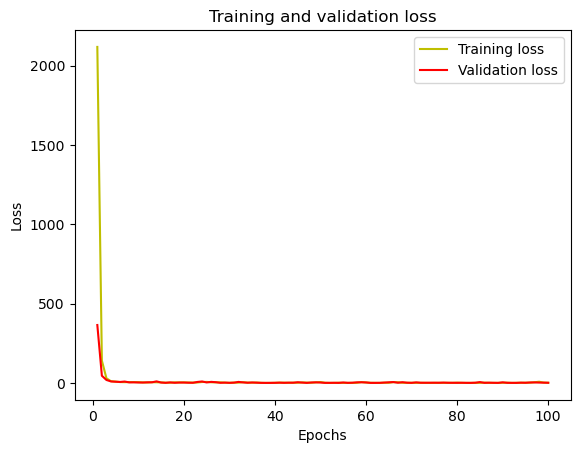

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

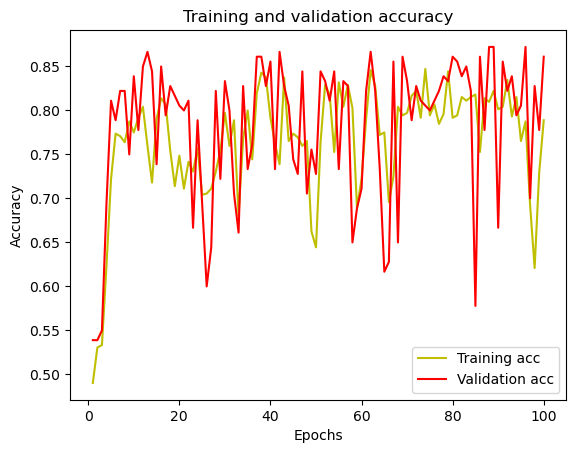

In [111]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [112]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        97
           1       0.79      0.95      0.86        83

    accuracy                           0.86       180
   macro avg       0.87      0.87      0.86       180
weighted avg       0.88      0.86      0.86       180

[[76 21]
 [ 4 79]]
